### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

Q1.

Assume you have the following dataset of 15 points


25,    37,    24,    28,    2,    35,    22,    31,    53,    41,    64,    29,    120,    72,    2


* Write a code in python to find

  1. Mean
  2. Median
  3. Mode
  4. Standard deviation
  5. Interquartile range


* Can you find out which of the points are outliers in the above dataset?

* Use any library in python to create boxplot of the above dataset

In [ ]:
data = np.array([25.0, 37, 24, 28, 2, 35, 22, 31, 53, 41, 64, 29, 120, 72, 2])

In [ ]:
mean = data.mean()
median = np.percentile(data, 50.0)
mode = stats.mode(data)
standard_deviation = data.std()
iqr = stats.iqr(data)

In [ ]:
print("1. Mean: ", mean)
print("2. Median: ", median)
print("3. Mode: ", mode[0])
print("4. Standard Deviation: ", standard_deviation)
print("5. Inter Quartile Range: ", iqr)

1. Mean:  39.0
2. Median:  31.0
3. Mode:  2.0
4. Standard Deviation:  28.55170747958868
5. Inter Quartile Range:  22.5


In [ ]:
s = pd.Series(data)

In [ ]:
s.mean()

39.0

In [ ]:
s.median()

31.0

In [ ]:
s.mode()

0    2.0
dtype: float64

In [ ]:
s.std(ddof=0)

28.55170747958868

In [ ]:
stats.iqr(s)

22.5

* Can you find out which of the points are outliers in the above dataset?

In [ ]:
Q1 = np.percentile(data, 25.0)
Q3 = np.percentile(data, 75.0)
LOWER_LIMIT = Q1 - 1.5 * iqr
UPPER_LIMIT = Q3 + 1.5 * iqr

LOWER_LIMIT, UPPER_LIMIT

(-9.25, 80.75)

In [ ]:
%%time
#anything which is beyond lower and upper limit are outliers
for elem in data:
  if elem < LOWER_LIMIT or elem > UPPER_LIMIT:
      print(elem)

120.0
CPU times: user 97 µs, sys: 12 µs, total: 109 µs
Wall time: 113 µs


In [ ]:
%time
data[(data < LOWER_LIMIT) | (data > UPPER_LIMIT)]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


array([120.])

In [ ]:
120. = 120.0

* Use any library in python to create boxplot of the above dataset

In [ ]:
import matplotlib.pyplot as plt

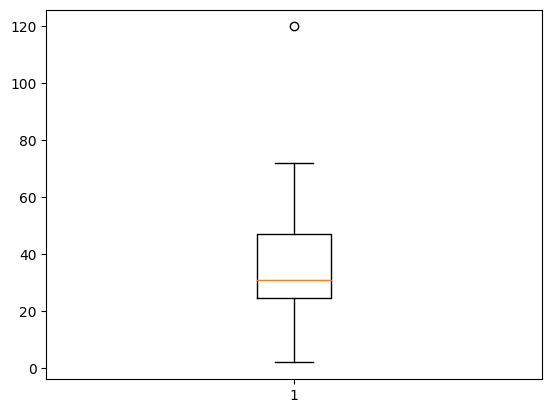

In [ ]:
fig = plt.figure()

# Creating plot
plt.boxplot(data)

# show plot
plt.show()

**Observation**
* Note that point near 120 mark is our outlier



---



---



Q2.

John is visiting planet Utopia and he figures out that the population is 1 million. Utopians are very tall and their height varies between 180 cm  and 250 cm. John tries to estimate the population size by randomly identifying 10000 people n times and finds their mean heights. Can you help John do the following using python?

a. Generate population samples of size 10000 with height between 180 cm  and 250 cm by varying n(number of times you identify 10000 random people) as following

1. 5
2. 10
3. 100
4. 1000
5. 10000

In [ ]:
population_array = []

for POPULATION_SIZE in [5, 10, 100, 1000, 100000]:
  temp_array = []
  for i in range(0, POPULATION_SIZE):
    temp_array.append(np.random.randint(180, 250, size=10000))

  population_array.append(temp_array)

b. Plot histogram of the population means

<Axes: ylabel='Count'>

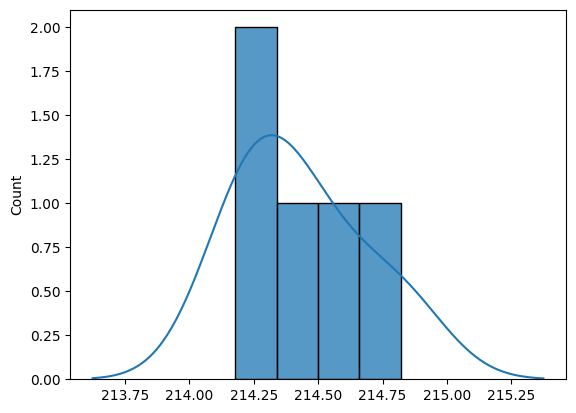

In [ ]:
mean_arr_5 = [elem.mean() for elem in population_array[0]]
sns.histplot(mean_arr_5)
sns.kdeplot(mean_arr_5)

<Axes: ylabel='Count'>

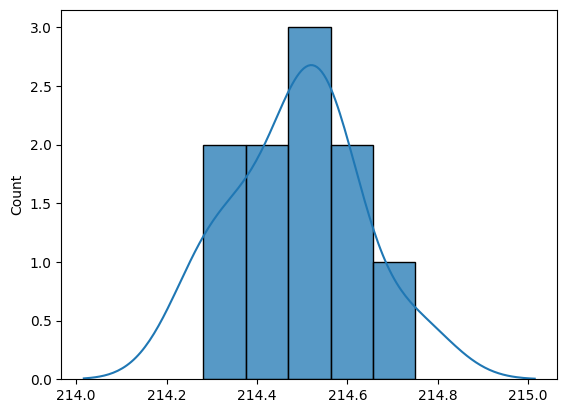

In [ ]:
mean_arr_10 = [elem.mean() for elem in population_array[1]]
sns.histplot(mean_arr_10)
sns.kdeplot(mean_arr_10)

<Axes: ylabel='Count'>

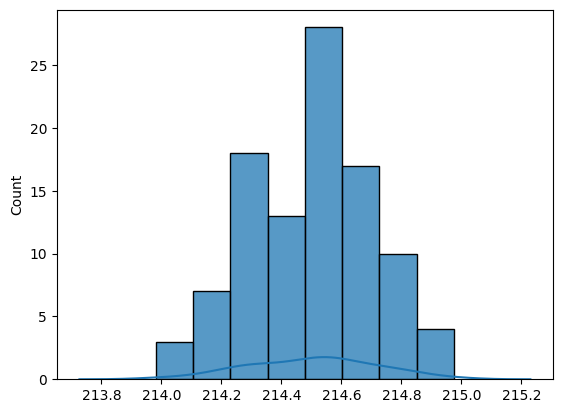

In [ ]:
mean_arr_100 = [elem.mean() for elem in population_array[2]]
sns.histplot(mean_arr_100)
sns.kdeplot(mean_arr_100)

<Axes: ylabel='Count'>

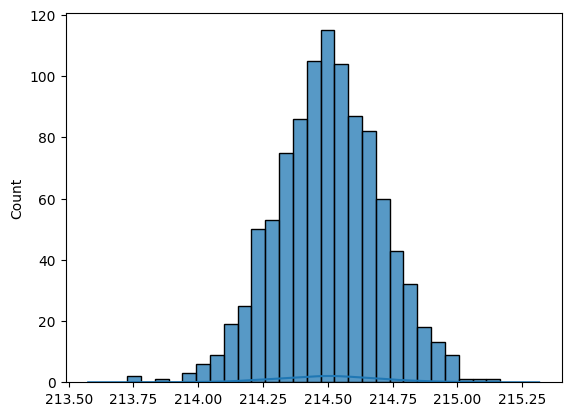

In [ ]:
mean_arr_1000 = [elem.mean() for elem in population_array[3]]
sns.histplot(mean_arr_1000)
sns.kdeplot(mean_arr_1000)

<Axes: ylabel='Count'>

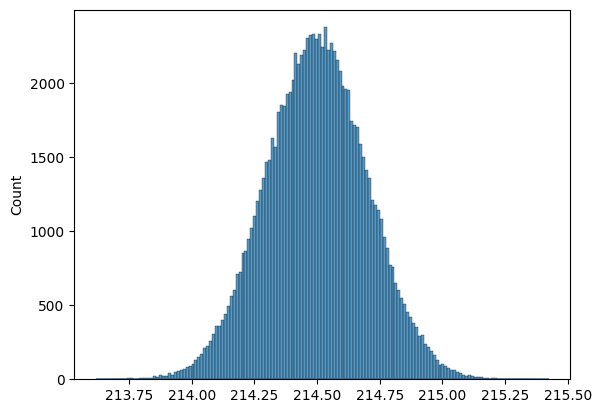

In [ ]:
mean_arr_100000 = [elem.mean() for elem in population_array[4]]
sns.histplot(mean_arr_100000)
sns.kdeplot(mean_arr_100000)

c. Does the population mean approach normal distribution as the sample size increases?

* You can see from the above plots that as the number of samples increases the variance decreases and the plot starts looking more concise
* Now recall CLT, distribution becomes  more normal as sample size is increasing ans we can see it here



---



---



Q3.

Observe the dataset below and write a python code to compute following

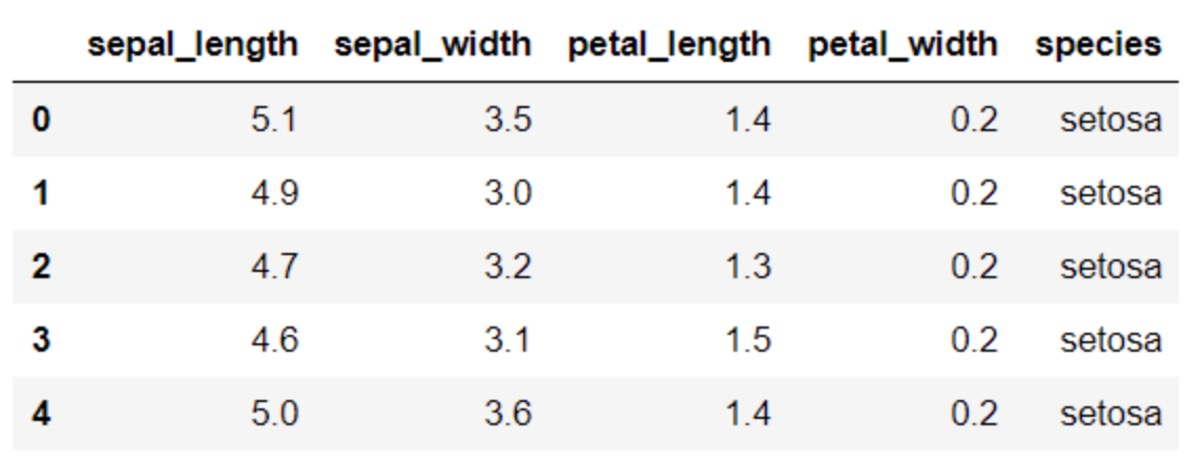

In [ ]:
## Let us first prepare our dataframe from the above table's image

sepal_length = pd.Series([5.1, 4.9, 4.7, 4.6, 5.0])  #pandas series
sepal_width = pd.Series([3.5, 3.0, 3.2, 3.1, 3.6])  #pandas series

#pandas concat function can combine multiple series into single frame
df = pd.concat({'sepal_length': sepal_length, 'sepal_width': sepal_width}, axis=1)
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


a. Covariance between sepal_length and sepal_width

In [ ]:
df.cov()

,sepal_length,sepal_width
sepal_length,0.0430,0.0365
sepal_width,0.0365,0.0670


b. Pearson Correlation between sepal_length and sepal_width

In [ ]:
df.corr(method='pearson')

,sepal_length,sepal_width
sepal_length,1.000000,0.680019
sepal_width,0.680019,1.000000


c. Spearman Correlation between sepal_length and sepal_width

In [ ]:
df.corr(method='spearman')

,sepal_length,sepal_width
sepal_length,1.0,0.6
sepal_width,0.6,1.0




---



---



Q4.

Generate exponential distribution in Python using scipy library using rate=25 and sample size=100.

In [ ]:
import scipy.stats as stats

rate = 25  # rate parameter
sample_size = 100  # sample size

# generate exponential distribution with rate parameter
exponential_dist = stats.expon(scale=1/rate)

# generate 100 samples from the exponential distribution
samples = exponential_dist.rvs(size=sample_size)

print(samples)

[5.15309294e-02 6.19669368e-02 1.45839394e-01 4.93466522e-03
 9.43111203e-03 1.32726708e-02 1.10001802e-01 3.80230840e-02
 4.93559621e-02 7.24305731e-02 1.08937125e-03 2.69195352e-02
 8.03149640e-02 9.68277994e-02 1.23979368e-02 2.71386626e-03
 3.15737272e-02 7.04820166e-03 1.90157424e-02 4.54036863e-02
 6.82181406e-03 3.46750318e-03 3.97141233e-03 6.38053058e-02
 2.43711754e-02 1.71729818e-02 2.48210102e-03 2.75757445e-02
 6.65867587e-02 3.86788373e-03 6.96893287e-03 1.53619771e-02
 4.46941580e-02 3.08473830e-02 7.14671101e-02 3.36199404e-02
 2.27707955e-02 2.45330563e-02 5.27129791e-03 4.93528103e-02
 5.80170471e-02 5.52175555e-02 6.91605184e-02 1.12905875e-02
 3.53349862e-02 1.44723224e-02 1.15625258e-01 1.55258764e-02
 2.19815844e-02 2.64347291e-02 8.12766119e-03 3.38483226e-02
 6.53471801e-02 1.12958418e-01 1.44142260e-02 2.21124011e-02
 1.24829096e-02 4.87827999e-02 5.41163679e-02 3.77947156e-02
 4.85909267e-02 2.50419685e-02 3.70291473e-02 3.69229339e-02
 7.59476999e-02 8.276261

a. Plot a histogram of the the above distribution


<Axes: ylabel='Count'>

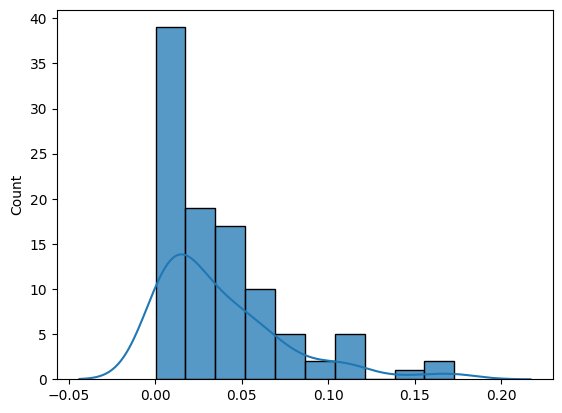

In [ ]:
sns.histplot(samples)
sns.kdeplot(samples)

b. Calculate probability that x is less than 50 when the mean rate is 25

P(X < x) = 1 - exp(-λx)

In this case, the mean rate is 25, so λ = 1/25.

We want to find the probability that X is less than 50, so x = 50. Plugging these values into the formula, we get:

P(X < 50) = 1 - exp(-50/25)
= 1 - exp(-2)
≈ 0.8647



---



---



Q5.

Steve has just learnt about linear regression and MLE and is trying to find out the relationship between them. He uses the following dataset to learn the relation between humidity and temperature

[Dataset](https://www.kaggle.com/datasets/budincsevity/szeged-weather?resource=download)

a. Prepare a sample of the dataset and calculate correlation between  humidity and temperature

In [ ]:
df = pd.read_csv('weatherHistory.csv')[['Humidity', 'Temperature (C)']].sample(n = 1000)
df.head()

FileNotFoundError: ignored

In [ ]:
df.corr()

b. Use minimise function from scipy to get the optimal parameters


You can use np.array([2, 2, 2]) to initialise the parameters

In [ ]:
from scipy.optimize import minimize

In [ ]:
# MLE
x = df['Humidity'].values
y = df['Temperature (C)'].values

def MLE_Norm(parameters):
  const, beta, std_dev = parameters
  pred = const + beta*x

  LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
  neg_LL = -1*LL
  return neg_LL

mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

C . Try out following methods to estimate the parameters(optional)

i. Use statsmodels to fit a linear regression model using OLS

In [ ]:
from statsmodels import api

In [ ]:
features = api.add_constant(df['Humidity'])
model = api.OLS(df['Temperature (C)'].values, features).fit()
model.summary()

In [ ]:
res = model.resid
standard_dev = np.std(res)
standard_dev

ii. Compare the parameters obtained in b & c. What did you observe?

* We can seet that the parameters obtained using OLS and MLE are same


* x = 35.1170
* y = -32.1917
* std = 7.568

